# BBT045: Intro to Python programming for data analysis

Author: Vi Varga (Based on work of: Filip Buric)

Last Updated: 11.01.2024


## Intro

This module will be relying on the following material, which you are encouraged to read more extensively beyond the requirement for this course.

Becoming comfortable (not only familiar) with a programming language is a like a superpower and you'll find it enables you to do many more things beyond the initial context (and enhances your employment outlook).

- [*An Introduction to Programming for Bioscientists: A Python-Based Primer*](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004867) by Ekmekci et al.
    - This PLoS article is a good overview/introduction to the use of Python for data science. 
    - Some aspects may seem confusing in the beginning, but Python (like all languages, programming or otherwise) is best learned through _use_. As you work your way through this course, this article can be used a reference. 

- [*Python for Data Analysis, 3E*](https://wesmckinney.com/book/) by Wes McKinney
    - An alternative option for exploring the use of Python in the context of data analysis & scientific computing
    - Much more detailed than the PLoS article above, but less relevant for bioinformatics - a potentially useful reference

- [*Intro to Advanced Python*](https://python-course.eu/advanced-python/) by Bernd Klein
    - This website provides resources for some of the more advanced utility of Python, which can improve your overall coding ability. 
    - The [*Intro to Python Tutorial*](https://python-course.eu/python-tutorial/) portion of the same website has more basic introductory materials, if you like all of your references to be in the same place. 

- Official documentation pages: You do not need to read these in their entirety, but they can provide helpful information for a variety of the modules we will be using. Here, I will include a few of the basics: 
    - Python programming language official website: https://www.python.org/
    - Pandas documentation: https://pandas.pydata.org/
    - Numpy documentation: https://numpy.org/
    - Scipy (Python for scientific computing): https://scipy.org/
    - Re (regex/regular expressions in Python): https://docs.python.org/3/library/re.html
    - Biopython: https://biopython.org/

- Miscellaneous :) There are many good resource on the web. We'll point out some when relevant.

For this module, please read the sections we point out. You can download a copy of this Jupyter Notebook from [here](intro_python_data_analysis.ipynb) for your own computer.


## Getting help

Most Python modules have good documentation.

If you are using the Spyder IDE, which is the Python IDE that comes with an Anaconda installation, you can access help pages for modules, functions and more by clicking on the relevant string with your cursor and entering `CTRL+I`. Find more information on the Spyder documentation pages, here: https://docs.spyder-ide.org/5/panes/help.html

In Jupyter Notebook or Jupyter Lab (where this notebook is intended to be used), you can access help pages for functions using `help()` or `?`, as shown in the cell below. 
- Note that the cell will not execute by default; this is to save on page space. You can test the results that would be output yourself, by removing the `%%script false --no-raise-error` command at the top of the cell ([Reference](https://stackoverflow.com/questions/19309287/how-to-intermittently-skip-certain-cells-when-running-ipython-notebook))
- Find more information here: https://problemsolvingwithpython.com/02-Jupyter-Notebooks/02.07-Getting-Help-in-a-Jupyter-Notebook/

Googling is of course an alternative - StackOverflow has plenty of very helpful Python users!

In [1]:
%%script false --no-raise-error

# using help()
import pandas as pd # this is how Pandas is commonly imported
help(pd.DataFrame) # DataFrame is a specific function of the Pandas module

# using ?
pd.Series?

## Prep

You can download a copy of this notebook [here](intro_python_data_analysis.ipynb).

We will also load the necessary modules here, prior to running any commands. As a general rule, it is a good idea to load all required modules at the beginning of a script, and to group them together. Especially when working in a Notebook format (as you are here), including the module loading commands later in the Notebook runs the risk, when you re-run sections, of forgetting to re-run the specific code cell in which the module loading command is found. 

In [2]:
# import modules
import pandas as pd # enables manipulation of dataframes in Python
import numpy as np # enables manipulation of arrays in Python
import random # fetches random values
from urllib.request import urlretrieve # enables the downloading of files from the internet via URL
import gzip # module to enable I/O of gzipped files
import shutil # module to perform operations on files
from Bio import SeqIO # import the SeqIO Biopython module for working with sequence data
import matplotlib.pyplot as plt # import the matplotlib graphics module
import seaborn as sns # import the seaborn graphics module
import warnings # module to manage warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # prevent Python from warning of future feature deprecation

## Attributes & Data Types

Much like in R, different data types have different attributes in Python. However, these attributes are not nearly as important in Python as they are in R (at least, not for the average user). You can get the attributes of a specific object using the command `dir()`, but the information returned by this command can be quite complicated. 

Data _types_, on the other hand, matter a lot in Python. Python will usually correctly assess the data type of a specific object, but it's worth checking, especially with data frames, as Python can sometimes make mistakes. The most commonly used data types in python are "str" (string), "int" (integer) and "float". Strings are text (i.e., words, sentences, etc.), integers are numbers without decimals and floats are numbers with decimals. Note that strings can be identified by the fact that they are _always_ printed by Python in quotation marks. 

In the following cells, you can see a demonstration of how this works. **Note that in Python, variable assignment is done using the format: `VARABLE_NAME = VARIABLE_CONTENT`**

In [3]:
# string
test_string = "test string"
print('The content of variable test_string is the string ' + test_string)
print(type(test_string))

# integer
test_int = 3
print('The content of variable test_int is the string ' + str(test_int))
# note that when numbers are concatenated with strings in a print statement, the number has to converted to a string with str()
print(test_int)
print(type(test_int))

# float
test_float = 3.14159
print("The content of variable test_float is the string " + str(test_float))
# Note that while Python will return strings in double quotes, you can provide strings to Python in single quotes
type(test_float)

The content of variable test_string is the string test string
<class 'str'>
The content of variable test_int is the string 3
3
<class 'int'>
The content of variable test_float is the string 3.14159


float

### Working with Python data structures

Base Python uses 4 primary data structures (list, tuple, set, dictionary), and a variety of modules enable users to create others. 

For our purposes in this course, the most important of these modules are Pandas, which allows Python users to create and manipulate dataframes; and Numpy, which enables the creation and manipulation of arrays. These two data structures (dataframes and arrays) are slightly different, but a number of Numpy array commands can be used to manipulate Pandas dataframes, as well. If you are interested in learning more, you can can learn more about the differences here: https://www.askpython.com/python/pandas-dataframe-vs-numpy-arrays

Below, you'll be introduced to how these data structures function in Python. For a quick reference sheet on Python data types and data structures, see here: https://www.w3schools.com/python/python_datatypes.asp

### Lists

Lists in Python are exactly what they sound like: a comma-separated _list_ of objects, which you can create by surrounding the the elements of the list with [brackets]. 

The elements of lists can be changed; and they can contain a variety of different data types. See more information here: https://www.w3schools.com/python/python_lists.asp

In [4]:
# list
test_list = ["test", "list", "example"]
print(test_list)
print(type(test_list))

['test', 'list', 'example']
<class 'list'>


### Tuples

Tuples are similar to lists, except that their contents are static (i.e., the contents cannot be changed). You can create a tuple by including a comma-separated list of objects in (parentheses). See more information here: https://www.w3schools.com/python/python_tuples.asp

The elements of a tuple are indexed. **Note that indexing in Python starts with 0, and index values should be contained in [brackets].**

In [5]:
# tuple
test_tuple = ("test", "tuple", "example")
print(test_tuple)
print(type(test_tuple))
# indexing example
print('The second element of the tuple is the word "' + test_tuple[1] + '".')

('test', 'tuple', 'example')
<class 'tuple'>
The second element of the tuple is the word "tuple".


### Set

Sets are also similar to lists, in that they are 1-dimensional and include multiple values. Like tuples, their contents cannot be changed; though unlike tuples, objects can be added to or removed from a set. Also unlike tuples, sets are unordered, so the elements cannot be indexed. See more information here: https://www.w3schools.com/python/python_sets.asp

Sets are created by including a comma-separated list of objects in {braces}.

In [6]:
# set
test_set = {"test", "set", "example"}
print(test_set)
# note how this was likely printed to your screen in a different order from how the object were originally given to the set
print(type(test_set))

{'example', 'set', 'test'}
<class 'set'>


### Dictionary

Dictionaries are perhaps the most useful inbuilt data structure in Python. The consist of a series of key:value pairs, that allow you to store information with references. See more information here: https://www.w3schools.com/python/python_dictionaries.asp

Below, the basics of dictionary creation and use are demonstrated: 

In [7]:
# dictionary
test_dict = {"key1": "value1",
             "key2": "value2",
             "key3": "value3"}
print(test_dict)
print(type(test_dict))

# reference a specific value in a dictionary with DICTIONARY_NAME[KEY]
print('The value associated with key2 is "' + test_dict["key2"] + '".')

{'key1': 'value1', 'key2': 'value2', 'key3': 'value3'}
<class 'dict'>
The value associated with key2 is "value2".


## Iterating over data structures

Data structures are important for _storing_ data, but will not be of much use if you do not know how to actually extract data from them. Below are a few examples of `if`/`else` statements, `for` loops and `while` loops in Python, using some of the data structures introduced above. 

One thing to note before you begin coding in Python, is that **indentation matters**. Unlike in R, the end of a particular code block is defined not by the closing of parentheses, but by the end of a specific level of indentation. If you have problems getting code that seems right to you to work, one of the first things to check should be whether your indentation is correct. For example, if one line is indented using a tab ("\t"), and the next line is indented using 4 spaces ("   "), Python will return an error that may be less than helpful, depending on your IDE. 

### `if` statements

If statements in Python test the truth of a condition. If the condition evaluetes to `True`, then the command(s) within the `if` statement are executed. Note that successive if statements are evaluated independently of one another, so be careful about putting them in a row. If you wish to test a secondary condition (i.e., one or multiple alternatives to the first `if` statement), use `elif` for the alternative condition tests. An `else` statement cannot be combined with an alternative condition, so using `else` will finish the section of code started by the previous `if` statement made at that indentation level.

In the code block below, an `if` statement is used to evaluate whether a randomly generated integer is greater than (>), less than (<) or equal to (==) 0. See more about conditionals in Python here: https://www.w3schools.com/python/python_conditions.asp

In [8]:
k = random.randint(-10, 10) # return a random integer between -10 and 10

if k > 0:
    # see if the value of k is >0
    print("The value of k is positive.")
elif k < 0:
    # see if the value of k is <0
    print("The value of k is negative.")
else: 
    # if neither the primary nor secondary conditions are fulfilled
    # i.e., if k==0
    print("The value of k is 0.")

The value of k is negative.


### `for` loops and/vs. `while` loops

A `for` loop will iterate over a range of items within an iterable object (ex., the elements of list, the keys in a dictionary, etc.), while a `while` loop with evaluate/continue to loop until the given condition returns `False`.

Programmers often learn to use one or the other, and then build their code around the way that their preferred loop type works. Personally, I prefer `for` loops, because in my work as a bioinformatician, I am generally looping through each of the elements in an iterable object (most often a list or dictionary). I prefer to place `if` statements within my `for` loops in order to filter my data, rather than use `while` loops. As a result, most (if not all) of the examples/solutions I provide you will use `for` loops. However, you are free to use `while` loops in your own code, if you wish.

- See more about `for` loops here: https://www.w3schools.com/python/python_for_loops.asp
- See more about `while` loops here: https://www.w3schools.com/python/python_while_loops.asp

In [9]:
# while loop

# set the iterator j to 0
j = 0

while j <= 7:
    print(j)
    j += 1 
    # add +1 to the value of j with each iteration of the loop
    # the looping will stop once j == 8

0
1
2
3
4
5
6
7


In [10]:
# for loop

# looping over a list

# list of accession numbers for a few RAS proteins
# source: https://www.ebi.ac.uk/interpro/entry/pfam/PF00071/protein/UniProt/#table
ras_list = ["A0A010Q0G0", "A0A010Q6W4", "A0A010Q7K6", "A0A010QKF9", "A0A010QSB8"]

for ras_prot in ras_list: 
    # loop over the elements of ras_list
    if ras_prot.endswith("8"): 
        # find a RAS protein accession ending with the number 8
        # and print the results
        print("The RAS protein accesion number " + ras_prot + " ends with the number 8.")


# looping over a dictionary

# dictionary of bacterial species and associated phyla
bacteria_dict = {"Gardnerella vaginalis": "Actinobacteria",
                "Lactobacillus crispatus": "Firmicutes",
                "Lactobacillus iners": "Firmicutes"}

# loop over the dictionary to find which species are Firmicutes
for key, value in bacteria_dict.items():
    # iterate over the items in a dictionary
    # using this method may be unnecessary here, but it allows the flexibility of accessing both keys & values
    if bacteria_dict[key] == "Firmicutes":
        # identify dictionary elements where the value is Firmicutes
        print(key + " is a Firmicute (Bacillota).")

The RAS protein accesion number A0A010QSB8 ends with the number 8.
Lactobacillus crispatus is a Firmicute (Bacillota).
Lactobacillus iners is a Firmicute (Bacillota).


## Working with tabular data: Pandas

Many datasets can naturally be organized in tables. Unfortunately, Python does not have a built-in method for working with dataframes; this is where the Pandas and Numpy modules come into the picture. 

We've already imported these modules, so now we will begin by importing a data table into a Pandas dataframe (Note that `pandas` is generally imported as the abbreviation `pd`, while `numpy` is generally imported as the abbreviation `np`). In order to run the code below, make sure that the iris.csv (modified from [here](https://ocw.mit.edu/courses/15-097-prediction-machine-learning-and-statistics-spring-2012/resources/iris/) to include column names) file is located in the same directory as this .ipynb Jupyter Notebook file.

In [11]:
# save the file name to a variable
iris_db = "iris.csv"

# import the iris dataset into a Pandas dataframe
iris_df = pd.read_csv(iris_db, sep=',', header=0)

print(iris_df.columns)

# print the dataframe
iris_df

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Filtering rows based on values

Pandas has inbuilt utility that allows you to filter the dataframe. 

For example, to filterthe iris_df dataframe to only the rows which have sepal lengths greater than or equal to 5, do the following: 

In [12]:
iris_df.loc[iris_df['Sepal_Length'] >= 5]
# note that this doesn't save the filtered dataframe, only displays it

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Selecting & working on columns

To select a column of a Pandas dataframe, use the syntax `DATAFRAME[COLUMN_NAME]`

To select multiple columns of a Pandas dataframe, use the syntax `DATAFRAME[[COLUMN_NAME_1, COLUMN_NAME_2]]`

A variety of manipulations/transformations can be done on the contents of Pandas columns, including (but very much not limited to):
- Mathematical transformations (ex., `dataframe.column.mul(2)` multiplies all values in the selected dataframe column by 2)
- Text manipulation
- Creating new columns based on existing columns

In [13]:
# get the log10 values of sepal length
print(np.log10(iris_df['Sepal_Length']))
# Pandas has inbuilt methods for multiplication mul(), division .div(), addition .add() & substraction .sub()
# but for more complicated math, numpy can help
print(iris_df['Sepal_Length'].add(3))

0      0.707570
1      0.690196
2      0.672098
3      0.662758
4      0.698970
         ...   
145    0.826075
146    0.799341
147    0.812913
148    0.792392
149    0.770852
Name: Sepal_Length, Length: 150, dtype: float64
0      8.1
1      7.9
2      7.7
3      7.6
4      8.0
      ... 
145    9.7
146    9.3
147    9.5
148    9.2
149    8.9
Name: Sepal_Length, Length: 150, dtype: float64


In [14]:
# manipulate text in a column
iris_df['Class'] = iris_df['Class'].str.replace('Iris-', '')
# above, removing the Iris- substring from the Class column and saving the edit to the dataframe
iris_df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
# divide two columns by each other
# once again, we use Numpy to accomplish this
iris_df['Petal_WdivD'] = iris_df['Petal_Length']/iris_df['Petal_Width']
# round the new column to 3 decimal places
iris_df['Petal_WdivD'] = iris_df['Petal_WdivD'].round(3)

# now see the new dataframe
iris_df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class,Petal_WdivD
0,5.1,3.5,1.4,0.2,setosa,7.000
1,4.9,3.0,1.4,0.2,setosa,7.000
2,4.7,3.2,1.3,0.2,setosa,6.500
3,4.6,3.1,1.5,0.2,setosa,7.500
4,5.0,3.6,1.4,0.2,setosa,7.000
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2.261
146,6.3,2.5,5.0,1.9,virginica,2.632
147,6.5,3.0,5.2,2.0,virginica,2.600
148,6.2,3.4,5.4,2.3,virginica,2.348


### Working on groups of values

Sometimes data has natural categorizations, that you would like to group the data by, in order to get a feel for the characteristics of a particular group. Pandas allows you to quickly organize your data in such a way using `groupby`.

In [16]:
# using groupby

# group the data according to the type of iris and get the means of each type of data for that iris type
iris_df.groupby(['Class']).mean()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Petal_WdivD
Class,,,,,
setosa,5.006,3.418,1.464,0.244,7.07802
versicolor,5.936,2.770,4.260,1.326,3.24290
virginica,6.588,2.974,5.552,2.026,2.78060


### Lambda functions, etc.

Throughout this Jupyter Notebook, you have been introduced to the basic functionality and grammar of the Python programming language; as well as to the use of the Pandas module, in particular, as it will be important for this course. However, there of course remain a wide variety of functionalities available in Python (not to mention, available through all of the many Python modules that are available), to which have yet to be introduced. It is not within the scope of this course to dive into all of those possible applications. However, I will here briefly introduce you to one more thing.

_Lambda functions_ are small anonymous functions that can be used to manipulate data when Python's (or a Python module's) inbuilt functionality doesn't enable you to do what you are trying to. (Anonymous functions are unnamed functions: Essentially, they are functions that exist only within a single line of code, rather than within the broader set of local or global variables.) Writing anonymous functions can be tricky, but it's worth briefly taking a look at the structure of them here, so that you can recognize what they are, if they happen to pop up in a StackOverflow solution to a problem you're trying to solve.

Lambda functions take the form: `lambda ARGUMENT(S): EXPRESSION` where the argument(s) are the placeholder variable names for the arguments you are supplying to the function, and the expression is the actual function, itself. An illustrative example is provided below. 

In [17]:
# lambda function

# create a Pandas dataframe with lists in one of the columns
d = {'sequence_ids': ["seq_1", "seq_2"], 'sequence_start': ["ACTGTGTG", "ATGTGTG"], 'functional_profile': [["protein folding", "chaperone"], ["immune", "autoimmune", "white blood cells"]]}
df = pd.DataFrame(data=d)
print(df)

# expand the lists into comma-separated strings using a lambda function
df['functional_profile'] = df['functional_profile'].apply(lambda x: ', '.join(map(str, x)))
print(df)

  sequence_ids sequence_start                       functional_profile
0        seq_1       ACTGTGTG             [protein folding, chaperone]
1        seq_2        ATGTGTG  [immune, autoimmune, white blood cells]
  sequence_ids sequence_start                     functional_profile
0        seq_1       ACTGTGTG             protein folding, chaperone
1        seq_2        ATGTGTG  immune, autoimmune, white blood cells


## Application: Reading FASTA files

[Biopython](https://biopython.org/) is a collection Python modules built for bioinformaticians and biologists: it contains a variety of modules with functions that enable you to manipulate biological data, as well as open file types unique to biology (ex., FASTA files). While it isn't necessary to use Biopython to do bioinformatics (personally, I only use it on rare, specific occasions), it can be a very useful tool. Modules in the Biopython package can be imported using `import Bio.MODULE` (note the capital "B") (see the module import section earlier in this document). For more information, see also the [Biopython Tutorial & Cookbook](https://biopython.org/DIST/docs/tutorial/Tutorial.pdf).

Let's load ORFs and protein sequences from a reference yeast genome using the `Bio.SeqIO` module. For more information on this module, check out the [Biopython SeqIO Wiki page](https://biopython.org/wiki/SeqIO) or [ReadTheDocs page](https://biopython.org/docs/1.75/api/Bio.SeqIO.html).

Note that this is not the only way to load a FASTA file into Python. You can simply parse/iterate over the file to extract necessary information, transform it into a Pandas dataframe, or (my personal favorite) turn it into a dictionary. An example for loading a FASTA file into a dictionary is given below. 

In [18]:
# for more detailed information on downloading files from the internet with Python, see: 
# https://realpython.com/python-download-file-from-url/

# set necessary variables
url = ("http://sgd-archive.yeastgenome.org/sequence/S288C_reference/orf_dna/orf_genomic_all.fasta.gz")
filename = "orf_trans.fasta.gz"

# download file
urlretrieve(url, filename)

('orf_trans.fasta.gz', <http.client.HTTPMessage at 0x7f79141ea950>)

In [19]:
# open the FASTA file & extract the data

# we need to start by decompressing the gzipped file because Biopython does not play well with gzipped files
# ref: https://github.com/biopython/biopython/issues/1686
# we can do this with the gzip module
# ref: https://stackoverflow.com/questions/31028815/how-to-unzip-gz-file-using-python
with gzip.open(filename, 'rt') as f_in:
    # open the gzipped file for reading
    # create the output filename based on the input filename
    new_file = filename.removesuffix('.gz')
    with open(new_file, 'wt') as f_out:
        # now open the new file for writing
        # and write out the contents
        shutil.copyfileobj(f_in, f_out)

# now create a dictionary 
# ref: https://stackoverflow.com/questions/29333077/reading-a-fasta-file-format-into-python-dictionary
yeast_seq_dict = {rec.id : rec.seq for rec in SeqIO.parse(new_file, "fasta")}

# print the first key and value from the dictionary: a header & sequence
# get the first key
yeast_key_1 = list(yeast_seq_dict.keys())[0]
print(yeast_key_1)
print(yeast_seq_dict[yeast_key_1])

YAL069W
ATGATCGTAAATAACACACACGTGCTTACCCTACCACTTTATACCACCACCACATGCCATACTCACCCTCACTTGTATACTGATTTTACGTACGCACACGGATGCTACAGTATATACCATCTCAAACTTACCCTACTCTCAGATTCCACTTCACTCCATGGCCCATCTCTCACTGAATCAGTACCAAATGCACTCACATCATTATGCACGGCACTTGCCTCAGCGGTCTATACCCTGTGCCATTTACCCATAACGCCCATCATTATCCACATTTTGATATCTATATCTCATTCGGCGGTCCCAAATATTGTATAA


In [20]:
%%script false --no-raise-error

'''
For the sake of introducing Biopython, we created a sequence dictionary using the Bio.SeqIO module in the code above. 

However, it's worth noting that you can create this type of dictionary on your own, as well. 
In this code block, which will not execute by default, I demonstrate how that can be done. 
'''

# create an empty dictionary to fill with sequence information
seq_dict = {}

# iterate over the gzipped file's contents to extract information
with gzip.open(filename, "rt") as handle:
    # open the .gzip file for reading
    # create an empty list for the sequence information
    seq_list = []
    for line in handle: 
        # iterate through the file line by line
        if line.startswith(">"): 
            # identify the sequence header lines
            # first add the previous header & sequence to the dictionary
            if seq_list:
                # if list block contains sequence portions
                # concatenate the list into a single sequence
                seq_dict[header] = ''.join(seq_list)
                # empty the list
                seq_list = []
            header_full = line.strip()[1:]
            # remove the ">" character with [1:] and the end-line character with .strip()
            header = header_full.split()[0]
            # save only the sequence identifier to be the new header
        else: 
            # for the sequence lines
            seq_list.append(line.strip())
    if seq_list:
        # for the last sequence line
        # need to add the dictionary contents outside the main loop
        seq_dict[header] = ''.join(seq_list)

# reference for working with multi-line fastas
# https://stackoverflow.com/questions/50856538/how-to-convert-multiline-fasta-files-to-singleline-fasta-files-without-biopython

# now print the first key:value pair
key_1 = list(seq_dict.keys())[0]
print(key_1)
print(seq_dict[key_1])

Biopython's greatest advantage over base Python is the ability to perform operations that would be programmatically more complex (and would likely take longer both in terms of the amount of time required to generate the code, and in terms of the number of lines of code) in a quick and straightforward manner.

For example, below you can see how to use Biopython to generate the reverse complements of the yeast ORFs; and to translate the original ORF sequences. 

In [21]:
# reverse complements

with open(new_file, "r") as infile: 
    # open the fasta file for reading
    counter = 0 
    # here I will use a counter to prevent Python from printing every single result
    for record in SeqIO.parse(infile, "fasta"):
        # for each of the records in the fasta file
        counter += 1
        # add 1 to the counter for each record
        if counter <= 10:
        # only print the first 10 records
            # use SeqIO to find the complement sequences
            print( "For " + record.id + " the reverse complement sequence is '" + str(record.seq.complement()) + "'." )

For YAL069W the reverse complement sequence is 'TACTAGCATTTATTGTGTGTGCACGAATGGGATGGTGAAATATGGTGGTGGTGTACGGTATGAGTGGGAGTGAACATATGACTAAAATGCATGCGTGTGCCTACGATGTCATATATGGTAGAGTTTGAATGGGATGAGAGTCTAAGGTGAAGTGAGGTACCGGGTAGAGAGTGACTTAGTCATGGTTTACGTGAGTGTAGTAATACGTGCCGTGAACGGAGTCGCCAGATATGGGACACGGTAAATGGGTATTGCGGGTAGTAATAGGTGTAAAACTATAGATATAGAGTAAGCCGCCAGGGTTTATAACATATT'.
For YAL068W-A the reverse complement sequence is 'TACGTGCCGTGAACGGAGTCGCCAGATATGGGACACGGTAAATGGGTATTGCGGGTAGTAATAGGTGTAAAACTATAGATATAGAGTAAGCCGCCAGGGTTTATAACATATTGACGGGAATTATGTATGCAATATGGTGAAAACGTGGTATATGAATGGTGAGGTAAATATATGTGAATACAGTTATAATGTCTTTTTAGGGGTGTTTTTAGTGGATTTGTATTTTTATAAGATGAAAAGTTGTTATTATGTATT'.
For YAL068C the reverse complement sequence is 'TACCAGTTTAATTGAAGTTAGCGGCGACCACAGCGACGGTAGCGACGATGACGAAGACGTTGGTGGTGAGATCGAGTTAGACTGCTTTCTCAGTTGAACCACCTTAACCCACAGATGCAGAGACTATAGTCTCGAGTGAATCGGGTTATGATGTACAAGGTTCGGCGGGTGGGTTGACTTTGGATGGGTCAGCTTCAACGACTTCGGCAAAAGTTGATGCCACTGAAGTGGTGGTACAACTGGCCATAACGAGGTCTGGTTCACTGGTCTTACTAGTG

In [22]:
# translate the ORF sequences

with open(new_file, "r") as infile: 
    # open the fasta file for reading
    counter = 0 
    # here I will use a counter to prevent Python from printing every single result
    for record in SeqIO.parse(infile, "fasta"):
        # for each of the records in the fasta file
        counter += 1
        # add 1 to the counter for each record
        if counter <= 10:
        # only print the first 10 records
            # use SeqIO to find the complement sequences
            print( "For " + record.id + " the reverse complement sequence is '" + str(record.seq.translate()) + "'." )

For YAL069W the reverse complement sequence is 'MIVNNTHVLTLPLYTTTTCHTHPHLYTDFTYAHGCYSIYHLKLTLLSDSTSLHGPSLTESVPNALTSLCTALASAVYTLCHLPITPIIIHILISISHSAVPNIV*'.
For YAL068W-A the reverse complement sequence is 'MHGTCLSGLYPVPFTHNAHHYPHFDIYISFGGPKYCITALNTYVIPLLHHILTTPFIYTYVNITEKSPQKSPKHKNILLFNNNT*'.
For YAL068C the reverse complement sequence is 'MVKLTSIAAGVAAIAATASATTTLAQSDERVNLVELGVYVSDIRAHLAQYYMFQAAHPTETYPVEVAEAVFNYGDFTTMLTGIAPDQVTRMITGVPWYSSRLKPAISSALSKDGIYTIAN*'.
For YAL067W-A the reverse complement sequence is 'MPIIGVPRCLIKPFSVPVTFPFSVKKNIRILDLDPRTEAYCLSLNSVCFKRLPRRKYFHLLNSYNIKRVLGVVYC*'.
For YAL067C the reverse complement sequence is 'MYSIVKEIIVDPYKRLKWGFIPVKRQVEDLPDDLNSTEIVTISNSIQSHETAENFITTTSEKDQLHFETSSYSEHKDNVNVTRSYEYRDEADRPWWRFFDEQEYRINEKERSHNKWYSWFKQGTSFKEKKLLIKLDVLLAFYSCIAYWVKYLDTVNINNAYVSGMKEDLGFQGNDLVHTQVMYTVGNIIFQLPFLIYLNKLPLNYVLPSLDLCWSLLTVGAAYVNSVPHLKAIRFFIGAFEAPSYLAYQYLFGSFYKHDEMVRRSAFYYLGQYIGILSAGGIQSAVYSSLNGVNGLEGWRWNFIIDAIVSVVVGLIGFYSLPGDPYNCYSIFLTDDEIRLARKRLKENQTGKSDFET

## Application: Working with GFF files

The [General feature format](https://en.wikipedia.org/wiki/General_feature_format) contains information about genes and DNA, RNA, and protein sequences. It's structured as a ([Tab] delimited) table, meaning we can read it directly into a Pandas dataframe.

Read the genome info as GFF from the source website (the file is not copied, just read directly into the dataframe). We could parse the file to extract the column names, but it's just simpler if we write them.

In [23]:
# reading in a GFF file

# set necessary variables
gff_url = ("ftp://ftp.ncbi.nlm.nih.gov/genomes/archive/old_genbank/Bacteria/Halobacterium_sp_uid217/AE004437.gff")
gff_filename = "AE004437.gff"

# download file
urlretrieve(gff_url, gff_filename)


# gff files don't contain column names, so we have to manually provide those
col_names = ["sequence_id", "source", "feature", "start", "end", "score", "strand", "phase", "attributes"]

# read the GFF file into a Pandas dataframe
AE004437_df = pd.read_csv(gff_filename, sep = '\t', names = col_names, skiprows = 5, skipfooter = 1, engine = 'python')
# gff files are tab-separated, so need to specify sep='\t' because read_csv will assume sep=',' by default
# the names = colnames argument allows us to set the column names on import
# skiprows here skips the first n rows of the dataframe on import
# skipfooter skips the last n lines of the file; the last line of the GFF file contains only hashtags ("#")
# engine = 'python' prevents skipfooter from raising an error

# examine the dataframe
AE004437_df

,sequence_id,source,feature,start,end,score,strand,phase,attributes
0,AE004437.1,Genbank,region,1,2014239,.,+,.,"ID=id0;Name=ANONYMOUS;Dbxref=ATCC:700922,taxon..."
1,AE004437.1,Genbank,gene,248,1453,.,+,.,ID=gene0;Name=VNG_0001H;gbkey=Gene;locus_tag=V...
2,AE004437.1,Genbank,CDS,248,1453,.,+,0,ID=cds0;Name=AAG18645.1;Parent=gene0;Note=Vng0...
3,AE004437.1,Genbank,gene,1450,2115,.,+,.,ID=gene1;Name=yvrO;gbkey=Gene;gene=yvrO;locus_...
4,AE004437.1,Genbank,CDS,1450,2115,.,+,0,ID=cds1;Name=AAG18646.1;Parent=gene1;Dbxref=NC...
...,...,...,...,...,...,...,...,...,...
4290,AE004437.1,Genbank,CDS,2007840,2009699,.,+,0,ID=cds2055;Name=AAG20700.1;Parent=gene2107;Not...
4291,AE004437.1,Genbank,gene,2009709,2011541,.,-,.,ID=gene2108;Name=VNG_2678H;gbkey=Gene;locus_ta...
4292,AE004437.1,Genbank,CDS,2009709,2011541,.,-,0,ID=cds2056;Name=AAG20701.1;Parent=gene2108;Not...
4293,AE004437.1,Genbank,gene,2011729,2014239,.,+,.,ID=gene2109;Name=csg;gbkey=Gene;gene=csg;locus...


### Quick counts and visualizations

Plot a histogram of gene lengths from the GFF file:

     sequence_id   source feature    start      end score strand phase  \
0     AE004437.1  Genbank  region        1  2014239     .      +     .   
1     AE004437.1  Genbank    gene      248     1453     .      +     .   
2     AE004437.1  Genbank     CDS      248     1453     .      +     0   
3     AE004437.1  Genbank    gene     1450     2115     .      +     .   
4     AE004437.1  Genbank     CDS     1450     2115     .      +     0   
...          ...      ...     ...      ...      ...   ...    ...   ...   
4290  AE004437.1  Genbank     CDS  2007840  2009699     .      +     0   
4291  AE004437.1  Genbank    gene  2009709  2011541     .      -     .   
4292  AE004437.1  Genbank     CDS  2009709  2011541     .      -     0   
4293  AE004437.1  Genbank    gene  2011729  2014239     .      +     .   
4294  AE004437.1  Genbank     CDS  2011729  2014239     .      +     0   

                                             attributes  gene_length  
0     ID=id0;Name=ANONYMOUS;Dbxref=ATCC:

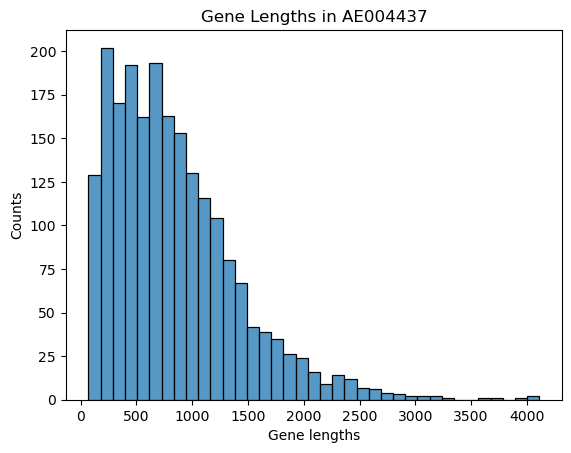

In [24]:
# use seaborn to generate a histogram of the gene lengths

# first, create a new column gene_length in the dataframe
AE004437_df["gene_length"] = AE004437_df.end - AE004437_df.start
print(AE004437_df)

# now plot the relevant data in a histogram
gene_length_plot = sns.histplot(data = AE004437_df[AE004437_df["feature"] == "gene"], x = "gene_length")
# data = AE004437_df[AE004437_df["feature"] == "gene"] will subset the Pandas dataframe to only the rows where feature == "gene"
# next add labels to the axes & a title
gene_length_plot.set_title('Gene Lengths in AE004437')
gene_length_plot.set_ylabel('Counts')
gene_length_plot.set_xlabel('Gene lengths')


# visualize the plot
gene_length_plot

# write the plot to a file using matplotlib
plt.savefig("AE004437_gene_lengths.svg")

### Inspect attributes

Let's see if the GFF file contains protein sequences, by running several operations:
- Extract only the `attributes` column
- On each row of this column, split the attributes into a list of individual character strings (for easier visual inspection)
- Randomly sample 4 entries to see what they contain

For **reproducibility**, every time one works with random numbers, the initial value ("seed") of the random number generator has to be set to a known value. (Computers cannot really generate random numbers, just number sequences that *look* random.)

In [25]:
# check for protein sequences in the GFF file

# now filter the dataset & sample it
sampled_df = AE004437_df[AE004437_df["feature"] == "gene"].attributes.str.split(";").sample(n = 4, random_state = 42)
# subset the dataframe as we did before
# one benefit of not leaving spaces in column names is that you can then use the formatting used here
# .attributes selects the "attributes" column of the subsetted dataframe
# specify that the column contains string information with .str
# split the strings into a list using the semicolons as the delimiter to split by
# randomly sample 4 rows from the column with .sample(n = 4, random_state = 42)
# the random_state argument to .sample sets the seed for reproducibility

# check the results
# ref: https://stackoverflow.com/questions/25351968/how-can-i-display-full-non-truncated-dataframe-information-in-html-when-conver
with pd.option_context('display.max_colwidth', None):
    # using this method prevents runcation of the column contents based on width
    display(sampled_df)

1112          [ID=gene544, Name=VNG_0686C, gbkey=Gene, locus_tag=VNG_0686C, old_locus_tag=VNG0686C]
4041         [ID=gene1986, Name=VNG_2523H, gbkey=Gene, locus_tag=VNG_2523H, old_locus_tag=VNG2523H]
861           [ID=gene420, Name=VNG_0533H, gbkey=Gene, locus_tag=VNG_0533H, old_locus_tag=VNG0533H]
1078    [ID=gene527, Name=trp4, gbkey=Gene, gene=trp4, locus_tag=VNG_0667G, old_locus_tag=VNG0667G]
Name: attributes, dtype: object